### Perceptrons and SGD  
In scikit learn, there is a (one layer) perceptron binary classifier that is the basis of multi-layer neural nets. It is similar to stochastic gradient descent SGD). Here, we run both on the whole Iris dataset focusing on classifying one species against the rest.  
Scikit-learn has multi-layer perceptrons as well but they are not suitable for heavy processing. Here, we use them on the breast cancer set (binary) and Iris (3 classes). They are also used for regression.

In [378]:
import numpy as np 
from sklearn.linear_model import SGDClassifier, Perceptron
from sklearn.datasets import load_iris 
import matplotlib.pyplot as plt
%matplotlib inline
iris = load_iris()
X = iris.data
y = (iris.target == 0).astype(np.int) # is it setosa

In [379]:
clf_p = Perceptron(random_state = 777)
clf_s = SGDClassifier()
clf_p.fit(X,y)
clf_s.fit(X,y)
print(clf_p.predict([[5.1,3.3,1.5,.3]]))
print(clf_s.predict([[3.1,3.3,1.5,1.3]]))

[1]
[1]


In [380]:
print(clf_s, clf_s.coef_, clf_s.intercept_)
print(clf_p, clf_p.coef_, clf_p.intercept_)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False) [[  6.86106346  21.72670097 -46.88393368 -22.29845626]] [ 9.97032653]
Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      n_iter=5, n_jobs=1, penalty=None, random_state=777, shuffle=True,
      verbose=0, warm_start=False) [[ 2.6  5.9 -8.9 -3.9]] [ 1.]


### Multi-layer perceptrons

In [381]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
scaler = StandardScaler()
X = cancer['data']
y = cancer['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=707)  

In [382]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [383]:
# 3 layers, with 90, 60 and 30 neurons 
mlp = MLPClassifier(hidden_layer_sizes=(90,60,30), solver = "sgd", alpha = 0.1, 
        activation='relu', learning_rate_init=0.01, learning_rate='adaptive', max_iter=180, random_state = 0) 
mlp.fit(X_train,y_train)
print("train score = ", mlp.score(X_train,y_train))

train score =  0.99765258216


In [384]:
predictions = mlp.predict(X_test)
print("test score = ", mlp.score(X_test,y_test))
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

test score =  0.979020979021
[[51  2]
 [ 1 89]]
             precision    recall  f1-score   support

          0       0.98      0.96      0.97        53
          1       0.98      0.99      0.98        90

avg / total       0.98      0.98      0.98       143



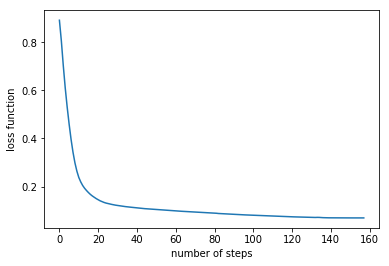

In [385]:
# not all solvers have loss_curves_, sgd does.
plt.plot(mlp.loss_curve_)
plt.ylabel("loss function")
plt.xlabel("number of steps")
None

In [386]:
#print(mlp.coefs_[3]) # for each layer neurons, weights
#print(mlp.intercepts_[0]) # for each layer, biases per neuron

### 3 classes, iris data

In [387]:
X2 = iris.data  # iris defined above
y2 = iris.target

In [388]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, stratify=y2, train_size=0.75, random_state=717)
scaler2 = StandardScaler() # StandardScaler(copy=True, with_mean=True, with_std=True)
#Iris dataset is 'scaled by default' (values between 0 to 10). In other cases, scaling is required.
#scaler2.fit(X2_train)
#X2_train = scaler2.transform(X2_train)
#X2_test = scaler2.transform(X2_test)
mlp2 = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(4,8,4,8,4), 
                     activation='tanh', max_iter=300, random_state = 0) # 
mlp2.fit(X2_train,y2_train)
predictions2 = mlp2.predict(X2_test)
print(confusion_matrix(y2_test,predictions2))
print(classification_report(y2_test,predictions2))

[[12  0  0]
 [ 0 13  0]
 [ 0  0 13]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        12
          1       1.00      1.00      1.00        13
          2       1.00      1.00      1.00        13

avg / total       1.00      1.00      1.00        38



In [389]:
mlp2

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(4, 8, 4, 8, 4), learning_rate='constant',
       learning_rate_init=0.001, max_iter=300, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

### Note:   
This does not mean we achieved perfect prediction. Change the splitted samples using another random state and see. We can also compute calss probabilities as follows: 


In [390]:
probs = mlp2.predict_proba(X2_test)
probs[:5]

array([[  9.99999373e-01,   6.27494309e-07,   2.52893983e-23],
       [  9.99999373e-01,   6.27335002e-07,   2.52834117e-23],
       [  2.52420329e-15,   1.00000000e+00,   5.60348794e-16],
       [  9.99999373e-01,   6.27317352e-07,   2.52827484e-23],
       [  2.52420360e-15,   1.00000000e+00,   5.60348782e-16]])

### MLP Regression Example

In [391]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import load_boston 
from sklearn.utils import shuffle
boston = load_boston()
Xb, yb = shuffle(boston.data, boston.target, random_state=13)
Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, train_size=0.75, random_state=717)
scaler3 = StandardScaler()
scaler3.fit(Xb_train)
Xb_train = scaler3.transform(Xb_train)
Xb_test = scaler3.transform(Xb_test)

In [392]:
Xb.shape
#Xb[:5]

(506, 13)

In [393]:
# lbfgs is good and fast for small datasets, adam (default) is also OK
mlg = MLPRegressor(solver='sgd',hidden_layer_sizes=(13,12,13), learning_rate = 'adaptive',
    alpha = 1.0, learning_rate_init=0.001, activation='tanh', max_iter=1000, verbose=False, random_state = 0)  
mlg.fit(Xb_train,yb_train)
predictionsb = mlg.predict(Xb_test)
print("R^2 train =", mlg.score(Xb_train,yb_train))
print("R^2 test =", mlg.score(Xb_test,yb_test))

R^2 train = 0.962219247616
R^2 test = 0.938375143166


In [394]:
predictionsb[:10]

array([ 10.86997782,  33.45083231,  22.43095408,  25.78199258,
        22.58335859,  24.4719946 ,  23.23578447,  23.80631976,
        35.13443828,  22.51245327])

In [395]:
yb_test[:10]

array([ 14.9,  31.7,  22.5,  30.7,  20.3,  27. ,  23. ,  18.6,  34.9,  21. ])

In [396]:
mlg

MLPRegressor(activation='tanh', alpha=1.0, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(13, 12, 13), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)